In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
!pip install fastai
from fastai.vision import *

    100% |████████████████████████████████| 153kB 10.0MB/s 
    100% |████████████████████████████████| 112kB 26.8MB/s 
    100% |████████████████████████████████| 61kB 16.4MB/s 
    100% |████████████████████████████████| 591.8MB 22kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x613e2000 @  0x7fc22a5742a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
  Running setup.py bdist_wheel for bottleneck ... - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/f2/bf/ec/e0f39aa27001525ad455139ee57ec7d0776fe074dfd78c97e4
  Running setup.py bdist_wheel for nvidia-ml-py3 ... - done
  Stored in directory: /root/.cache/pip/wheels/e4/1d/06/640c93f5270d67d0247f30be91f232700d19023f9e66d735c7
Successfully built bottleneck nvidia-ml-py3
torchvision 0

In [10]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [0]:
filepath = 'C:\\Users\\Yue\\Documents\\DeepLearning\\fastai\\dataset\\fruits-360\\Training'
path = untar_data(URLs.PETS)



In [12]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_img = path/'images'
path_anno = path/'annotations'

In [14]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_161.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/leonberger_18.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_113.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_42.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_11.jpg')]

In [0]:
np.random.seed(2)
pat = re.compile(r'/([^/]+)_\d+.jpg$')

In [0]:
bs = 64
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

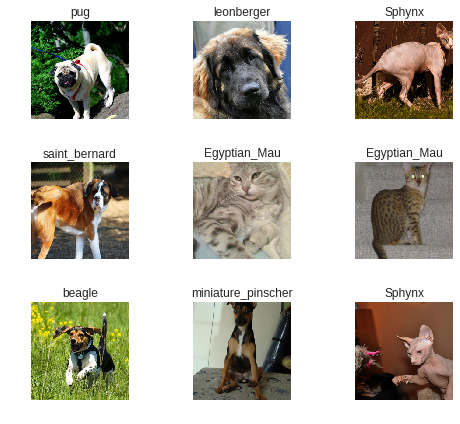

In [17]:
data.show_batch(rows = 3, figsize = (7, 6))

In [21]:
data.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [19]:
learner = create_cnn(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 25724728.48it/s]


In [20]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.402787,0.327428,0.094046
2,0.549043,0.240083,0.081867
3,0.332979,0.207914,0.075101
4,0.247742,0.209549,0.071042


In [0]:
learner.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learner)

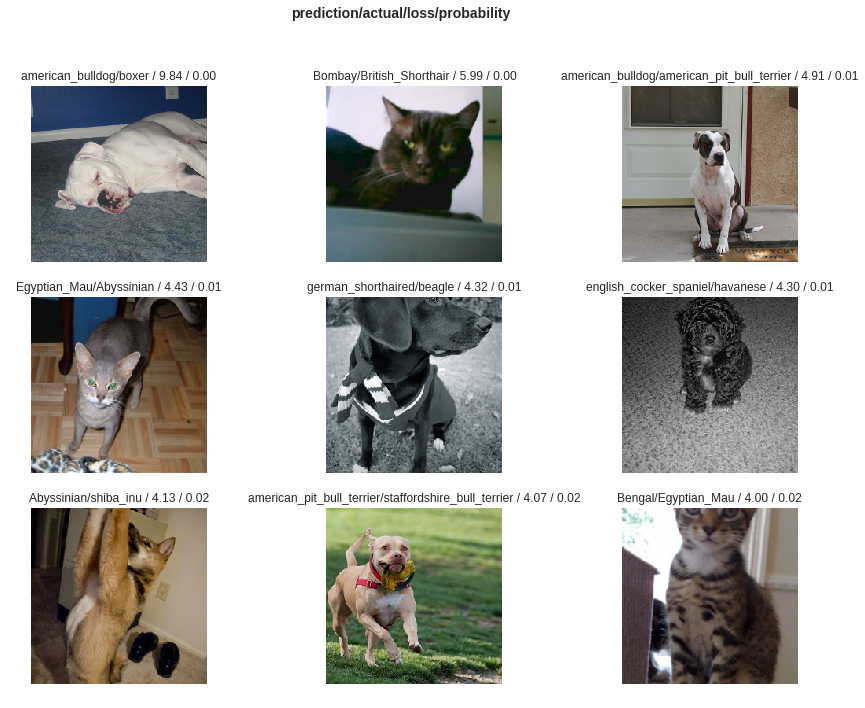

In [24]:
interp.plot_top_losses(9, figsize=(15, 11))

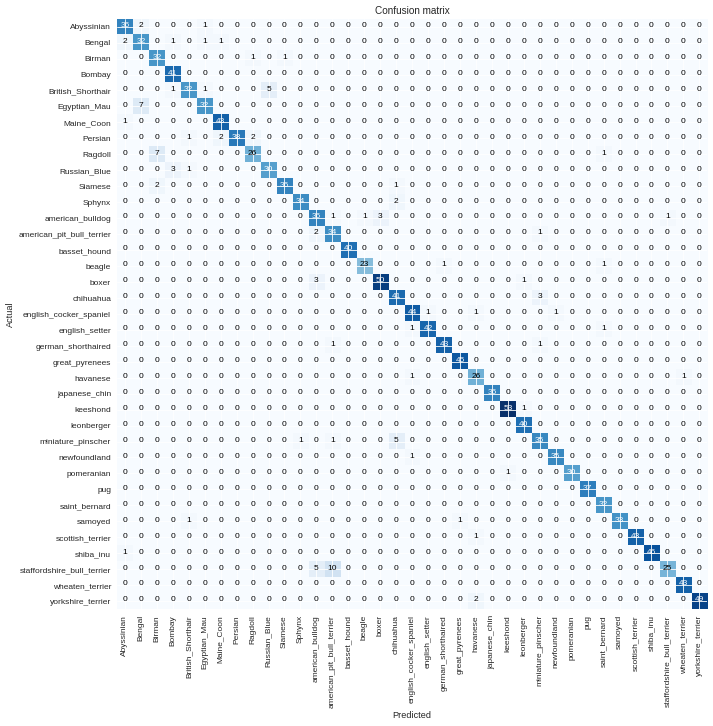

In [26]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi = 60)

In [27]:
interp.most_confused(min_val = 2)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 10),
 ('Egyptian_Mau', 'Bengal', 7),
 ('Ragdoll', 'Birman', 7),
 ('British_Shorthair', 'Russian_Blue', 5),
 ('miniature_pinscher', 'chihuahua', 5),
 ('staffordshire_bull_terrier', 'american_bulldog', 5),
 ('Russian_Blue', 'Bombay', 3),
 ('american_bulldog', 'boxer', 3),
 ('boxer', 'american_bulldog', 3),
 ('chihuahua', 'miniature_pinscher', 3)]

In [28]:
learner.lr_find()

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


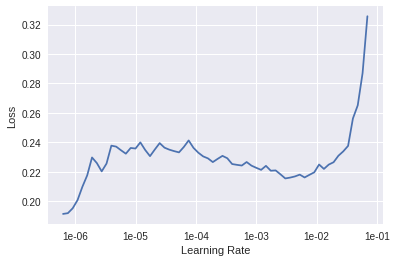

In [29]:
learner.recorder.plot()

# New Section